In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


c:\python27\lib\site-packages\pandas\_libs\__init__.py:4: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from .tslib import iNaT, NaT, Timestamp, Timedelta, OutOfBoundsDatetime
c:\python27\lib\site-packages\pandas\__init__.py:26: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import (hashtable as _hashtable,
c:\python27\lib\site-packages\pandas\core\dtypes\common.py:6: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import algos, lib
c:\python27\lib\site-packages\pandas\core\util\hashing.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  from pandas._libs import hashing, tslib
c:\python27\lib\site-packages\pandas\core\indexes\base.py:7: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected zd, got zd
  f

In [59]:
# importing data directly from the URL
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
dataset=pd.read_csv(url,names=['sepal-length','sepal-width','petal-length','petal-width','species'])

In [60]:
dataset.head(3)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [61]:
dataset.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
species          object
dtype: object

In [52]:
# bringing glm model here
import statsmodels.api as sm


In [53]:
#dataset.species[dataset.species=='Iris-setosa']=1
#dataset.species[dataset.species!='Iris-setosa']=0

c:\python27\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\python27\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


c:\python27\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


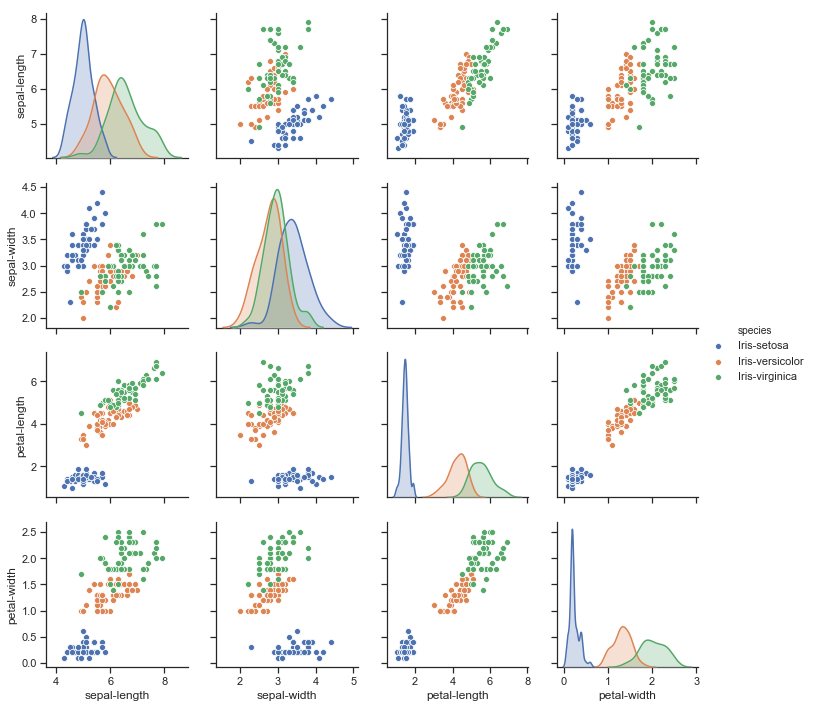

In [64]:
# create a scatter matrix of all the variables
sns.set(style="ticks")
sns.pairplot(dataset,hue="species")

In [65]:
# label dataset as input matrix X and ouput vector y
# not a dataframe though
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [66]:
y[1:3]

array(['Iris-setosa', 'Iris-setosa'], dtype=object)

In [67]:
# create training and test data from sklearn 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [68]:
# scaling of data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [69]:
X_train[1:3,:]

array([[-0.90875166,  0.52636495, -1.14012284, -0.89007697],
       [-1.02964989,  0.75521927, -1.19654129, -1.02161543]])

In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [71]:
y_pred=classifier.predict(X_test)

In [72]:
# evaluating the algorithm, learning the confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        10

      micro avg       1.00      1.00      1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [73]:
# how to choose the number of neigbor
# plot k with error
error=[]

# vary k from 1 to 40

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0,0.5,'Mean Error')

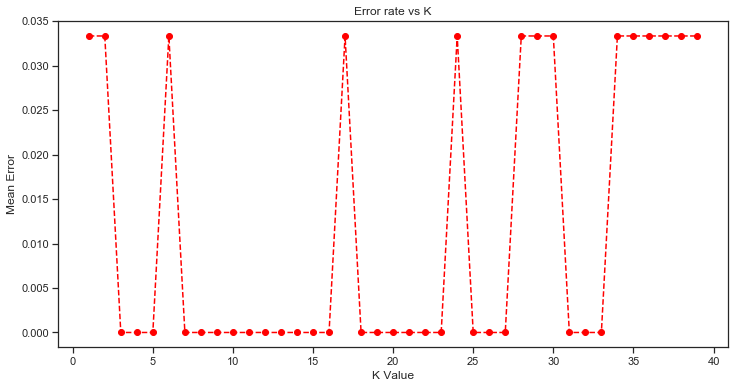

In [74]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o')
plt.title('Error rate vs K')
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  